Social Media Sentiment Analysis
Dataset:
https://www.kaggle.com/datasets/abdullah0a/social-media-sentiment-analysis-dataset

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [11]:
data=pd.read_csv(r"c:\Users\AFAQE\Downloads\data\Sentimet Analysis\Train.csv")
data

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,neutral
1,2,NaN,neutral
2,3,no politics danger now i can make a propaganda...,negative
3,4,i am the senate gets stabbed,neutral
4,5,is this a suicide,neutral
...,...,...,...
1995,1996,god gen alpha needs to chill,neutral
1996,1997,people when new generation does anything,positive
1997,1998,me when minor inconvenience,negative
1998,1999,as a gen z who didn experience brain rot in we...,negative


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2000 non-null   int64 
 1   Body            1772 non-null   object
 2   Sentiment Type  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [13]:
data.describe().round(1)

,Id
count,2000.0
mean,1000.5
std,577.5
min,1.0
25%,500.8
50%,1000.5
75%,1500.2
max,2000.0


In [16]:
data.isna().sum()

Id                  0
Body              228
Sentiment Type      0
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.isna().sum()

Id                0
Body              0
Sentiment Type    0
dtype: int64

In [19]:
data['Body']

0       rule 2 no metes about polarizing political top...
2       no politics danger now i can make a propaganda...
3                            i am the senate gets stabbed
4                                       is this a suicide
5                                                 removed
                              ...                        
1995                         god gen alpha needs to chill
1996             people when new generation does anything
1997                          me when minor inconvenience
1998    as a gen z who didn experience brain rot in we...
1999    ah the vine era had a boatload of cringe quote...
Name: Body, Length: 1772, dtype: object

In [10]:
train = data['Body'].to_numpy()

In [11]:
train[1]

'no politics danger now i can make a propaganda meme telling people to vote for julius caesar in the 59 bc roman senate elections'

<Axes: >

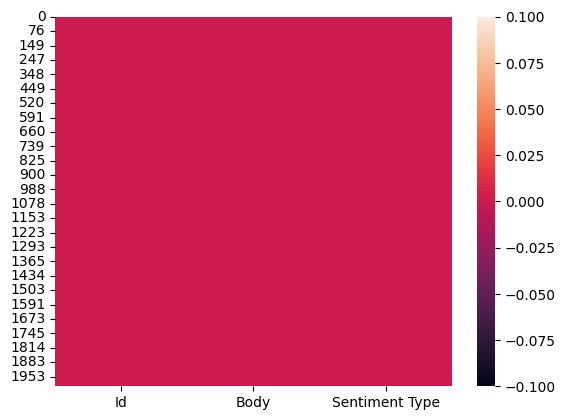

In [12]:
sns.heatmap(data.isna())

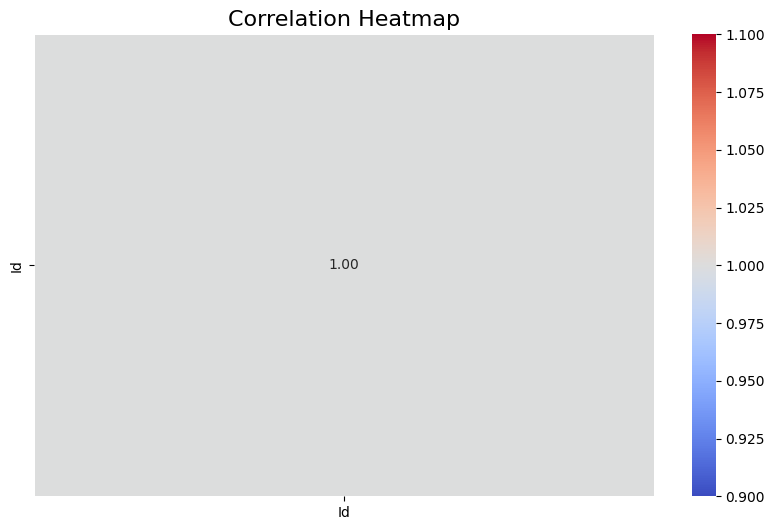

In [20]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

if not numeric_data.empty:
    plt.figure(figsize=(10, 6))  
    correlation_matrix = numeric_data.corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=16)

    plt.show()
else:
    print("No numeric columns to compute correlation.")

In [13]:
data['Sentiment Type'] = data['Sentiment Type'].map({
    'neutral': 0,
    'positive': 1,
    'negative': 2
})


data.head()

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,0
2,3,no politics danger now i can make a propaganda...,2
3,4,i am the senate gets stabbed,0
4,5,is this a suicide,0
5,6,removed,0


In [14]:
print(data.columns)


Index(['Id', 'Body', 'Sentiment Type'], dtype='object')


#Exploratory Data Analysis (EDA)

In [16]:
data['Sentiment Type'].value_counts()

Sentiment Type
0    782
1    632
2    358
Name: count, dtype: int64

In [18]:
data['Body'].apply(len)

0       531
2       128
3        28
4        17
5         7
       ... 
1995     28
1996     40
1997     27
1998    167
1999    139
Name: Body, Length: 1772, dtype: int64

In [19]:
data['Body'].apply(len).max()

804

<Axes: xlabel='Sentiment Type', ylabel='count'>

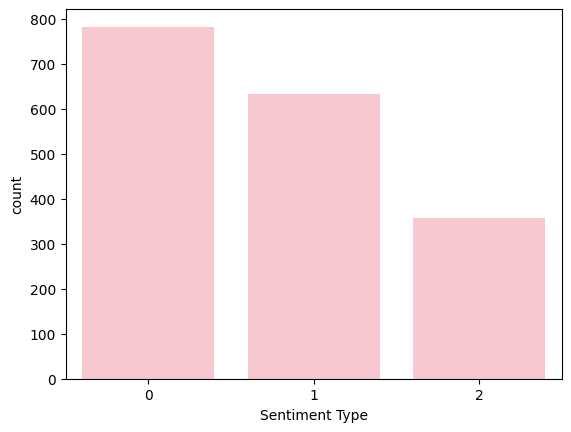

In [20]:
sns.countplot(x='Sentiment Type',data=data,color='pink')

<Axes: xlabel='Sentiment Type', ylabel='count'>

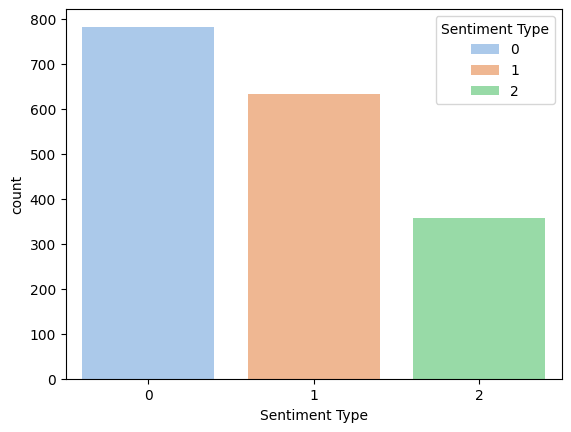

In [21]:
sns.countplot(x='Sentiment Type',data=data,hue='Sentiment Type',palette='pastel')

<Axes: >

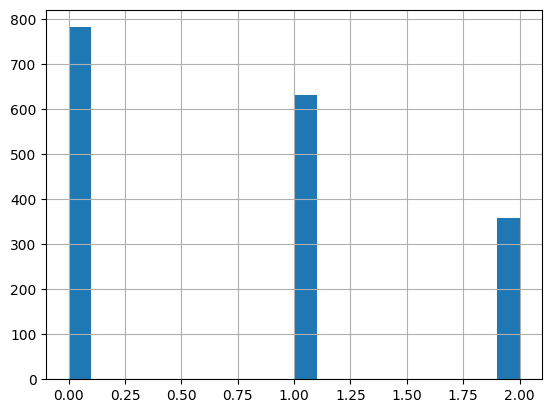

In [22]:
data['Sentiment Type'].hist(bins=20)

In [23]:
# حساب طول كل منشور
data['text_length'] = data['Body'].apply(len)

# حساب عدد الكلمات
data['word_count'] = data['Body'].apply(lambda x: len(x.split()))

# عرض إحصائيات الوصف الأساسية
data[['text_length', 'word_count']].describe().round(1)


,text_length,word_count
count,1772.0,1772.0
mean,78.4,14.9
std,89.3,16.9
min,1.0,1.0
25%,26.0,5.0
50%,48.0,9.0
75%,94.0,18.0
max,804.0,147.0


In [24]:

# عرض بعض العينات من المنشورات
data['Body'].sample(5)


583        she looks like her dad happens alllll the time
1390                                          fly as hell
1052    my favorite is when you get banner from a sub ...
1904    that that was the most beautiful fucking piece...
1854                                 just dont get robbed
Name: Body, dtype: object

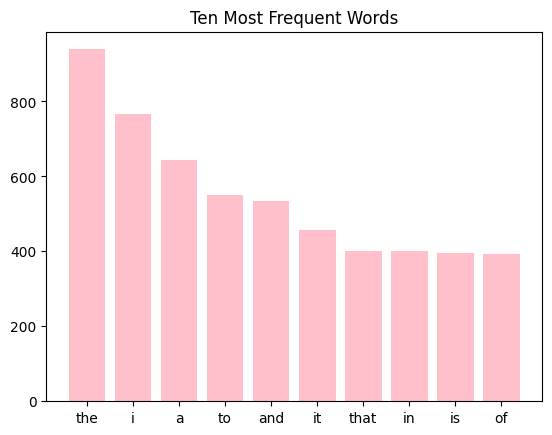

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

# حساب الكلمات الأكثر تكراراً
word_freq = Counter(" ".join(data['Body']).split())

# استخراج الكلمات الأكثر تكراراً
common_words = word_freq.most_common(10)

# عرض النتائج
plt.bar([item[0] for item in common_words], [item[1] for item in common_words],color="pink")
plt.title('Ten Most Frequent Words')
plt.show()


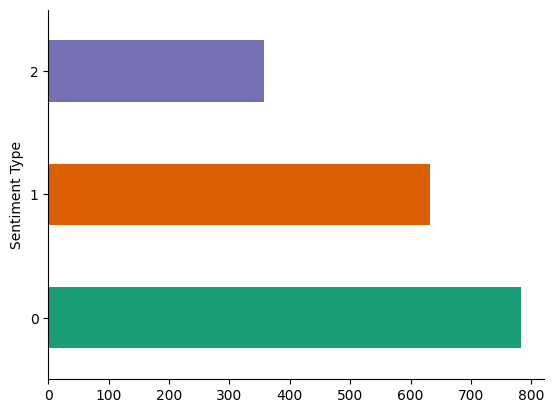

In [28]:
data.groupby('Sentiment Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


In [5]:
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AFAQE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
a=data['Body'] [0]
a

NameError: name 'data' is not defined

In [ ]:
st=re.sub('[^a-zA-Z]'," ",a)
st

'rule   no metes about polarizing political topics vulnerable groups violence etc no violation of credit content policytos no metes involving race ethnicity color nationality gender sexual orientationidentity religion disability etc can have a character but that part cannot be integral no mention of more worn murder suicide death terrorist shooting war tragedies sexual harassmentassault do even implied invest etc no politicspolitical topicsagendas absurd metes fearing politicians are allowed if said status is merely incidental'

In [ ]:
st=st.lower()
st

'rule   no metes about polarizing political topics vulnerable groups violence etc no violation of credit content policytos no metes involving race ethnicity color nationality gender sexual orientationidentity religion disability etc can have a character but that part cannot be integral no mention of more worn murder suicide death terrorist shooting war tragedies sexual harassmentassault do even implied invest etc no politicspolitical topicsagendas absurd metes fearing politicians are allowed if said status is merely incidental'

In [ ]:
st=st.split()
st

['rule',
 'no',
 'metes',
 'about',
 'polarizing',
 'political',
 'topics',
 'vulnerable',
 'groups',
 'violence',
 'etc',
 'no',
 'violation',
 'of',
 'credit',
 'content',
 'policytos',
 'no',
 'metes',
 'involving',
 'race',
 'ethnicity',
 'color',
 'nationality',
 'gender',
 'sexual',
 'orientationidentity',
 'religion',
 'disability',
 'etc',
 'can',
 'have',
 'a',
 'character',
 'but',
 'that',
 'part',
 'cannot',
 'be',
 'integral',
 'no',
 'mention',
 'of',
 'more',
 'worn',
 'murder',
 'suicide',
 'death',
 'terrorist',
 'shooting',
 'war',
 'tragedies',
 'sexual',
 'harassmentassault',
 'do',
 'even',
 'implied',
 'invest',
 'etc',
 'no',
 'politicspolitical',
 'topicsagendas',
 'absurd',
 'metes',
 'fearing',
 'politicians',
 'are',
 'allowed',
 'if',
 'said',
 'status',
 'is',
 'merely',
 'incidental']

In [ ]:
temp=[]
for word in st:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['rule',
 'metes',
 'polarizing',
 'political',
 'topics',
 'vulnerable',
 'groups',
 'violence',
 'etc',
 'violation',
 'credit',
 'content',
 'policytos',
 'metes',
 'involving',
 'race',
 'ethnicity',
 'color',
 'nationality',
 'gender',
 'sexual',
 'orientationidentity',
 'religion',
 'disability',
 'etc',
 'character',
 'part',
 'cannot',
 'integral',
 'mention',
 'worn',
 'murder',
 'suicide',
 'death',
 'terrorist',
 'shooting',
 'war',
 'tragedies',
 'sexual',
 'harassmentassault',
 'even',
 'implied',
 'invest',
 'etc',
 'politicspolitical',
 'topicsagendas',
 'absurd',
 'metes',
 'fearing',
 'politicians',
 'allowed',
 'said',
 'status',
 'merely',
 'incidental']

In [ ]:
# تان string عايزه ارجع الليست دي ل
st=' '.join(temp)
st

'rule metes polarizing political topics vulnerable groups violence etc violation credit content policytos metes involving race ethnicity color nationality gender sexual orientationidentity religion disability etc character part cannot integral mention worn murder suicide death terrorist shooting war tragedies sexual harassmentassault even implied invest etc politicspolitical topicsagendas absurd metes fearing politicians allowed said status merely incidental'

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
st=ps.stem(st)
st

'rule metes polarizing political topics vulnerable groups violence etc violation credit content policytos metes involving race ethnicity color nationality gender sexual orientationidentity religion disability etc character part cannot integral mention worn murder suicide death terrorist shooting war tragedies sexual harassmentassault even implied invest etc politicspolitical topicsagendas absurd metes fearing politicians allowed said status merely incident'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# انا عايزه دلوقت اعمل كل اللى انا عملته دا على الريفيوهات كلها علشان انا كنت شغاله على ريفيو واحد
corpus=[] #دي لست هعملها تكون بمثابه شنطه احط فيها الكلمات علشان بعد كدا اعملهم فيكتوريزيشن
for i in range(len(data)):           #لف على الداتا كلها
    st=re.sub('[^a-zA-Z]'," ",train[i])
    st=st.lower()
    st=st.split()
    st=[word for word in st if word not in stopwords.words('english')] #List Comprehension
    st=' '.join(st)
    st=ps.stem(st)
    corpus.append(st)
corpus

['rule metes polarizing political topics vulnerable groups violence etc violation credit content policytos metes involving race ethnicity color nationality gender sexual orientationidentity religion disability etc character part cannot integral mention worn murder suicide death terrorist shooting war tragedies sexual harassmentassault even implied invest etc politicspolitical topicsagendas absurd metes fearing politicians allowed said status merely incident',
 'politics danger make propaganda meme telling people vote julius caesar bc roman senate elect',
 'senate gets stab',
 'suicid',
 'remov',
 'et tumor brute laughs killing caesar auto',
 'face wind done palpating said',
 'ironic part successor tucked even harder uncle juliu',
 'going stab julius caesar',
 'senate brought legitimate rulership caesar remained true republ',
 'guess hear caesar made would need vote senate agre',
 'german supreme way',
 'think allow well take vot',
 'old',
 'senate evil',
 'kiss could read upset',
 'bar

In [ ]:
cv=CountVectorizer()
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(corpus)

1772

In [ ]:
X = cv.transform(corpus).toarray()
y = data['Sentiment Type'].to_numpy()
X.shape

(1772, 4189)

In [ ]:
y.shape

(1772,)

Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1417, 4189)

In [ ]:
X_test.shape

(355, 4189)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
print(len(X), len(y))


1772 1772


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)

print("training accuracy: ", svm_model.score(X_train,y_train))
print("testing accuracy: ", svm_model.score(X_test,y_test))

training accuracy:  0.9985885673959068
testing accuracy:  0.7070422535211267


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

print("training accuracy: ", random_forest.score(X_train,y_train))
print("testing accuracy: ", random_forest.score(X_test,y_test))

training accuracy:  1.0
testing accuracy:  0.7126760563380282
